In [45]:

# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\ALBERT\Downloads\Life_Expectancy_00_15.csv')


# # We know our data

In [2]:

# take a look at the data

df

,Country,Year,Continent,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Zimbabwe,2011,Africa,False,52.896,12894323,0.884886,8.081738,606.643960,46.165723,2101.824051,8.400000,1.407162,26.876148,67.016076,10.8,2.05000
1900,Zimbabwe,2012,Africa,False,55.032,13115149,0.915735,6.918354,636.248991,46.046633,2375.927006,12.000000,1.859609,26.533231,66.491185,11.1,2.07000
1901,Zimbabwe,2013,Africa,False,56.897,13350378,0.919824,7.110148,608.761669,45.927543,2560.773267,15.500000,1.868420,26.188786,65.966474,11.3,2.12000
1902,Zimbabwe,2014,Africa,False,58.410,13586710,0.889104,8.133525,628.746242,45.808453,2612.455954,16.364740,1.888080,25.832157,65.454108,11.6,2.23000


# # Cleaning data

In [4]:

# with this function we can see the number of non-null data and the data type

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              1904 non-null   object 
 1   Year                                                 1904 non-null   int64  
 2   Continent                                            1904 non-null   object 
 3   Least_Developed                                      1904 non-null   bool   
 4   Life_Expectancy                                      1904 non-null   float64
 5   Population                                           1904 non-null   int64  
 6   CO2_emissions                                        1904 non-null   float64
 7   Health_expenditure                                   1904 non-null   float64
 8   Electric_power_consumption                           1904 non-null  

In [7]:

# if we want we can see if we hafe null data with this function 

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (missing_data*100)))


Country - 0.0%
Year - 0.0%
Continent - 0.0%
Least_Developed - 0.0%
Life_Expectancy - 0.0%
Population - 0.0%
CO2_emissions - 0.0%
Health_expenditure - 0.0%
Electric_power_consumption - 0.0%
Forest_area - 0.0%
GDP_per_capita - 0.0%
Individuals_using_the_Internet - 0.0%
Military_expenditure - 0.0%
People_practicing_open_defecation - 0.0%
People_using_at_least_basic_drinking_water_services - 0.0%
Obesity_among_adults - 0.0%
Beer_consumption_per_capita - 0.0%


In [10]:

#Now we have to remove the duplicates 

df.drop_duplicates()


,Country,Year,Continent,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Zimbabwe,2011,Africa,False,52.896,12894323,0.884886,8.081738,606.643960,46.165723,2101.824051,8.400000,1.407162,26.876148,67.016076,10.8,2.05000
1900,Zimbabwe,2012,Africa,False,55.032,13115149,0.915735,6.918354,636.248991,46.046633,2375.927006,12.000000,1.859609,26.533231,66.491185,11.1,2.07000
1901,Zimbabwe,2013,Africa,False,56.897,13350378,0.919824,7.110148,608.761669,45.927543,2560.773267,15.500000,1.868420,26.188786,65.966474,11.3,2.12000
1902,Zimbabwe,2014,Africa,False,58.410,13586710,0.889104,8.133525,628.746242,45.808453,2612.455954,16.364740,1.888080,25.832157,65.454108,11.6,2.23000


In [13]:

# Order our Data a little bit to see

df.sort_values(by=['Life_Expectancy'], ascending=False)


,Country,Year,Continent,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
1614,Spain,2014,Europe,False,83.229268,46480882,5.184067,9.089364,5409.411338,37.084449,33525.740630,76.190000,1.254459,0.000000,99.926944,26.1,4.31000
1678,Switzerland,2014,Europe,False,83.197561,8188649,4.859166,10.616423,7807.058815,31.594088,64103.010450,87.400000,0.628104,0.000000,100.000003,20.4,3.17000
862,Italy,2014,Europe,False,83.090244,60789140,5.387475,8.867919,5159.183655,31.257049,36194.873920,55.638460,1.282970,0.000000,99.917034,22.1,1.73000
1613,Spain,2013,Europe,False,83.078049,46620045,5.208275,9.067377,5573.401182,37.082114,32434.003200,71.635000,1.272771,0.000000,99.956639,25.5,4.13000
1679,Switzerland,2015,Europe,False,82.897561,8282396,4.719649,11.007950,7520.166025,31.681067,66020.204340,87.479056,0.643891,0.000000,100.000000,20.8,3.17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,Zimbabwe,2006,Africa,False,43.853000,12155496,0.808688,6.697000,891.882938,46.761174,1687.154196,2.400000,2.215763,28.570942,69.638803,9.7,1.09000
1890,Zimbabwe,2002,Africa,False,43.523000,11954293,1.044813,7.978000,872.029686,47.237534,2165.322628,1.100000,7.079265,29.934082,71.706071,8.8,1.16072
1893,Zimbabwe,2005,Africa,False,43.241000,12076697,0.870271,6.925000,855.746769,46.880264,1706.399800,2.400000,1.627242,28.905681,70.163108,9.4,0.95668
1891,Zimbabwe,2003,Africa,False,43.195000,11982219,0.849592,7.479000,878.345545,47.118444,1828.524860,1.800000,2.298484,29.571215,71.211016,9.0,0.87637


In [13]:

# Order our Data a little bit to see

df.sort_values(by=['Life_Expectancy'], ascending=False)


,Country,Year,Continent,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
1614,Spain,2014,Europe,False,83.229268,46480882,5.184067,9.089364,5409.411338,37.084449,33525.740630,76.190000,1.254459,0.000000,99.926944,26.1,4.31000
1678,Switzerland,2014,Europe,False,83.197561,8188649,4.859166,10.616423,7807.058815,31.594088,64103.010450,87.400000,0.628104,0.000000,100.000003,20.4,3.17000
862,Italy,2014,Europe,False,83.090244,60789140,5.387475,8.867919,5159.183655,31.257049,36194.873920,55.638460,1.282970,0.000000,99.917034,22.1,1.73000
1613,Spain,2013,Europe,False,83.078049,46620045,5.208275,9.067377,5573.401182,37.082114,32434.003200,71.635000,1.272771,0.000000,99.956639,25.5,4.13000
1679,Switzerland,2015,Europe,False,82.897561,8282396,4.719649,11.007950,7520.166025,31.681067,66020.204340,87.479056,0.643891,0.000000,100.000000,20.8,3.17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,Zimbabwe,2006,Africa,False,43.853000,12155496,0.808688,6.697000,891.882938,46.761174,1687.154196,2.400000,2.215763,28.570942,69.638803,9.7,1.09000
1890,Zimbabwe,2002,Africa,False,43.523000,11954293,1.044813,7.978000,872.029686,47.237534,2165.322628,1.100000,7.079265,29.934082,71.706071,8.8,1.16072
1893,Zimbabwe,2005,Africa,False,43.241000,12076697,0.870271,6.925000,855.746769,46.880264,1706.399800,2.400000,1.627242,28.905681,70.163108,9.4,0.95668
1891,Zimbabwe,2003,Africa,False,43.195000,11982219,0.849592,7.479000,878.345545,47.118444,1828.524860,1.800000,2.298484,29.571215,71.211016,9.0,0.87637


# # Analysis


Now, thanks to the ordered data, I can make certain hypotheses. 

I believe that life expectancy will be closely related to: 
  a) the GDP_per_capita, 
  b) People_using_at_least_basic_drinking_water_services
  

<AxesSubplot:xlabel='GDP_per_capita', ylabel='Life_Expectancy'>

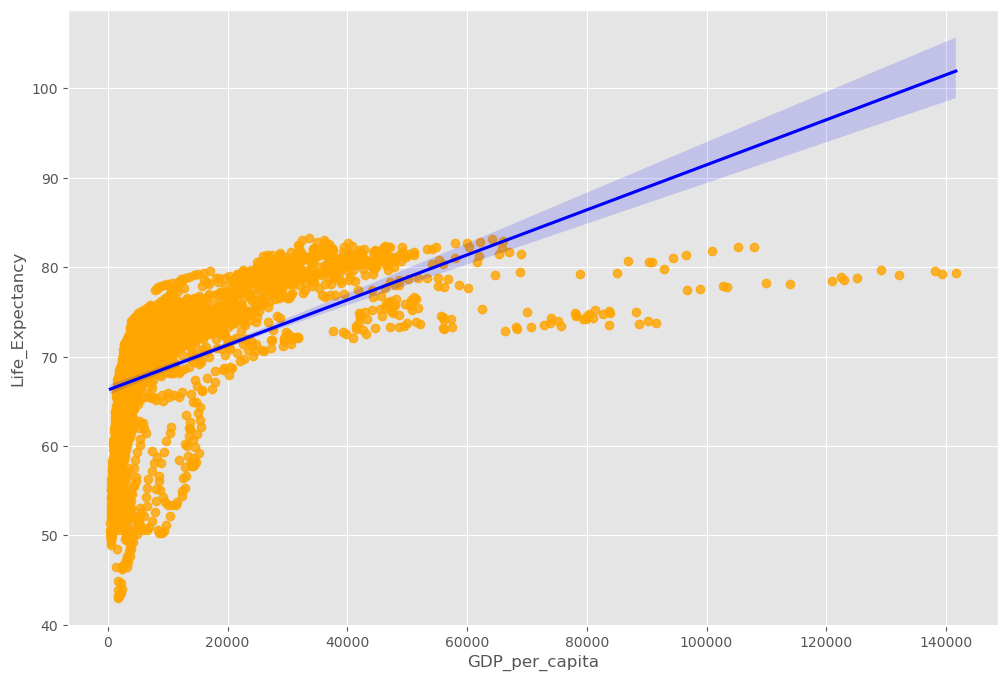

In [20]:

#hypotheses a)

sns.regplot(x="GDP_per_capita", y="Life_Expectancy", data=df, scatter_kws={"color":"orange"}, line_kws={"color":"blue"})


<AxesSubplot:xlabel='People_using_at_least_basic_drinking_water_services', ylabel='Life_Expectancy'>

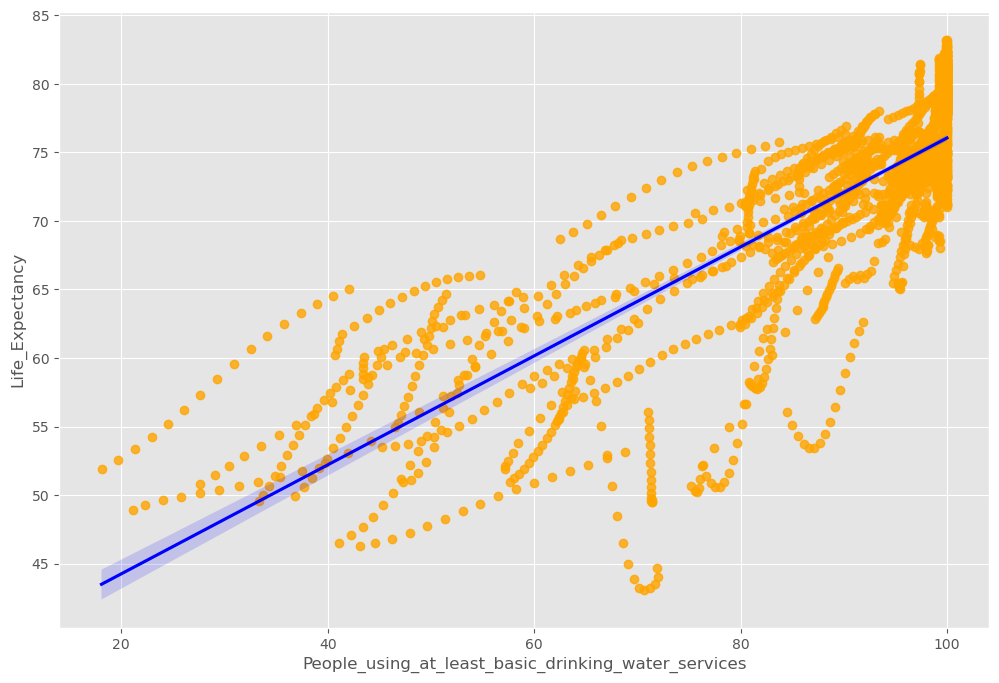

In [22]:

#hypotheses b)

sns.regplot(x="People_using_at_least_basic_drinking_water_services", y="Life_Expectancy", data=df, 
            scatter_kws={"color":"orange"}, line_kws={"color":"blue"})


In [27]:

# Correlation Matrix between all numeric columns

df.corr()



,Year,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
Year,1.000000e+00,2.606931e-14,0.185849,0.016881,-0.007824,0.124885,0.031718,-0.009027,0.158618,0.472374,-0.014236,-0.094066,0.098240,0.235361,0.037643
Least_Developed,2.606931e-14,1.000000e+00,-0.545006,-0.041313,-0.315040,-0.315096,-0.317721,0.079056,-0.321115,-0.374033,0.201352,0.628277,-0.761922,-0.568270,-0.312343
Life_Expectancy,1.858493e-01,-5.450062e-01,1.000000,-0.034534,0.463116,0.470676,0.558860,-0.041576,0.575147,0.698531,-0.088004,-0.668292,0.823990,0.694936,0.424960
Population,1.688149e-02,-4.131302e-02,-0.034534,1.000000,-0.052280,-0.095932,-0.081540,-0.046752,-0.102934,-0.081254,-0.005144,0.118525,-0.017643,-0.219247,-0.106689
CO2_emissions,-7.823612e-03,-3.150403e-01,0.463116,-0.052280,1.000000,0.093887,0.776558,-0.169936,0.857655,0.483592,0.052276,-0.394723,0.475386,0.551888,0.255271
Health_expenditure,1.248848e-01,-3.150956e-01,0.470676,-0.095932,0.093887,1.000000,0.354718,-0.001508,0.212978,0.542416,-0.064171,-0.262417,0.393771,0.500943,0.492582
Electric_power_consumption,3.171809e-02,-3.177209e-01,0.558860,-0.081540,0.776558,0.354718,1.000000,-0.017010,0.801724,0.678180,-0.019666,-0.403023,0.502311,0.548934,0.356195
Forest_area,-9.027123e-03,7.905573e-02,-0.041576,-0.046752,-0.169936,-0.001508,-0.017010,1.000000,-0.095339,0.059391,-0.242488,-0.041642,-0.034090,-0.187525,0.342658
GDP_per_capita,1.586180e-01,-3.211153e-01,0.575147,-0.102934,0.857655,0.212978,0.801724,-0.095339,1.000000,0.668715,0.004883,-0.402147,0.505428,0.556063,0.278368
Individuals_using_the_Internet,4.723740e-01,-3.740327e-01,0.698531,-0.081254,0.483592,0.542416,0.678180,0.059391,0.668715,1.000000,-0.123056,-0.474456,0.582517,0.646108,0.550320



**Since I want to see the correlation of all the data, including those that are object and bool, we are going to transform that data into integrer**


In [34]:

df_numerized= df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized


,Country,Year,Continent,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
0,0,2000,2,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,0,2001,2,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,0,2002,2,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,0,2003,2,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,0,2004,2,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,118,2011,0,False,52.896,12894323,0.884886,8.081738,606.643960,46.165723,2101.824051,8.400000,1.407162,26.876148,67.016076,10.8,2.05000
1900,118,2012,0,False,55.032,13115149,0.915735,6.918354,636.248991,46.046633,2375.927006,12.000000,1.859609,26.533231,66.491185,11.1,2.07000
1901,118,2013,0,False,56.897,13350378,0.919824,7.110148,608.761669,45.927543,2560.773267,15.500000,1.868420,26.188786,65.966474,11.3,2.12000
1902,118,2014,0,False,58.410,13586710,0.889104,8.133525,628.746242,45.808453,2612.455954,16.364740,1.888080,25.832157,65.454108,11.6,2.23000


In [35]:

df_numerized2= df 

for col_name in df_numerized2.columns:
    if(df_numerized2[col_name].dtype == 'bool'):
        df_numerized2[col_name] = df_numerized2[col_name].astype('category')
        df_numerized2[col_name] = df_numerized2[col_name].cat.codes
        
df_numerized2


,Country,Year,Continent,Least_Developed,Life_Expectancy,Population,CO2_emissions,Health_expenditure,Electric_power_consumption,Forest_area,GDP_per_capita,Individuals_using_the_Internet,Military_expenditure,People_practicing_open_defecation,People_using_at_least_basic_drinking_water_services,Obesity_among_adults,Beer_consumption_per_capita
0,0,2000,2,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,0,2001,2,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,0,2002,2,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,0,2003,2,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,0,2004,2,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,118,2011,0,0,52.896,12894323,0.884886,8.081738,606.643960,46.165723,2101.824051,8.400000,1.407162,26.876148,67.016076,10.8,2.05000
1900,118,2012,0,0,55.032,13115149,0.915735,6.918354,636.248991,46.046633,2375.927006,12.000000,1.859609,26.533231,66.491185,11.1,2.07000
1901,118,2013,0,0,56.897,13350378,0.919824,7.110148,608.761669,45.927543,2560.773267,15.500000,1.868420,26.188786,65.966474,11.3,2.12000
1902,118,2014,0,0,58.410,13586710,0.889104,8.133525,628.746242,45.808453,2612.455954,16.364740,1.888080,25.832157,65.454108,11.6,2.23000


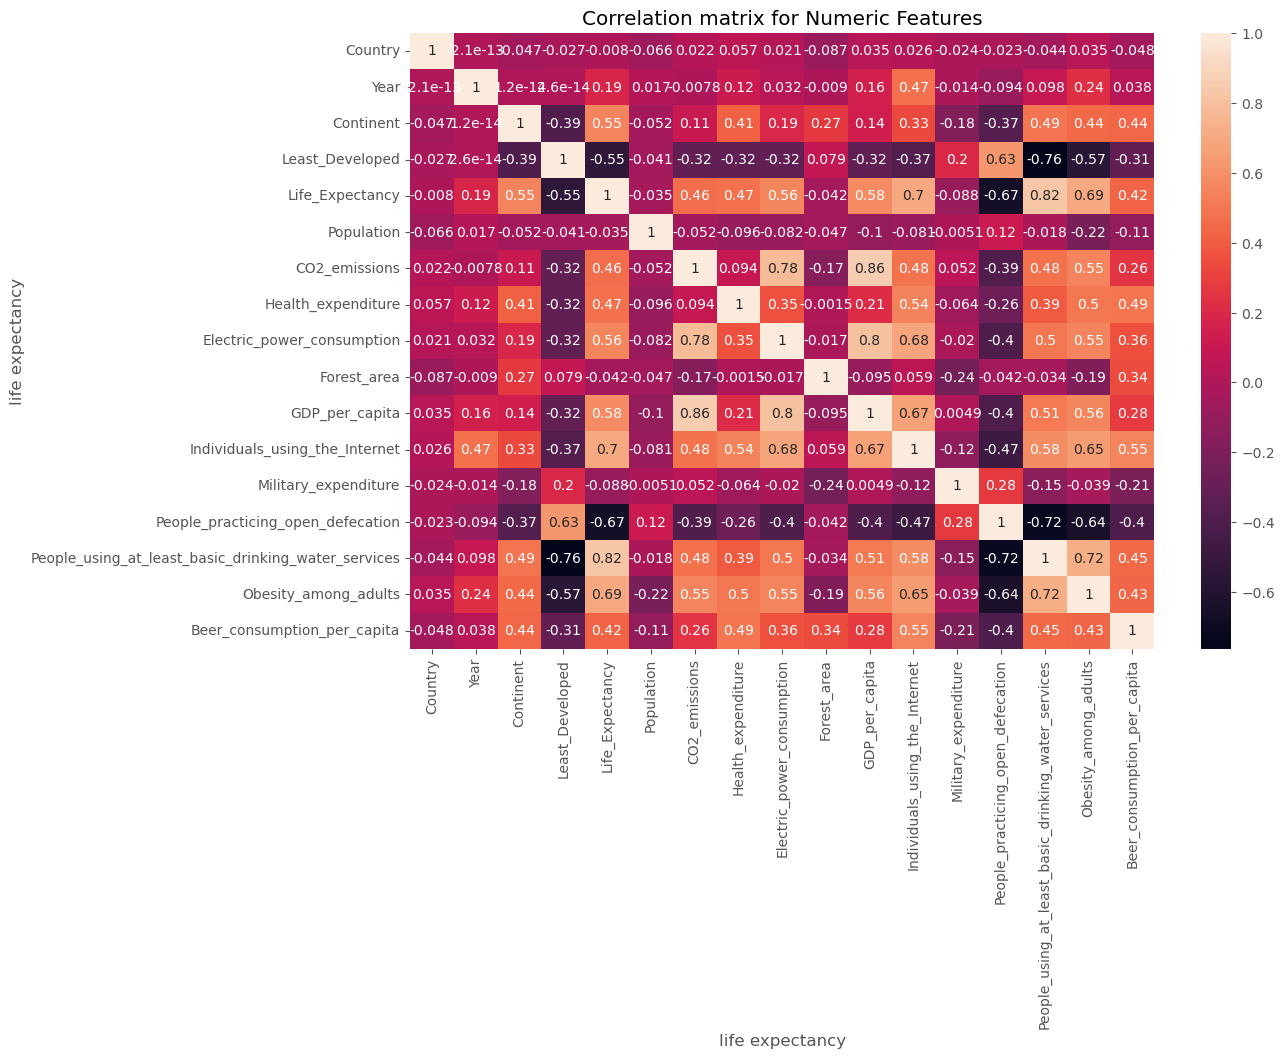

In [36]:


correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("life expectancy")

plt.ylabel("life expectancy")

plt.show()



**In this last visualization we can see the columns that have the highest correlation with life expectancy (more than 0.5).**


# #  Conclusions 


**The 3 columns with the highest correlation with life expectancy (more than 0.6) are:**

     1. the fact of having drinking water as number 1 with a correlation of 0.82
     
     2. Second internet use with 0.7
     
     3. and in third place, obesity with 0.69
     
     

[Text(0.5, 1.0, 'drinking water vs life expectancy')]

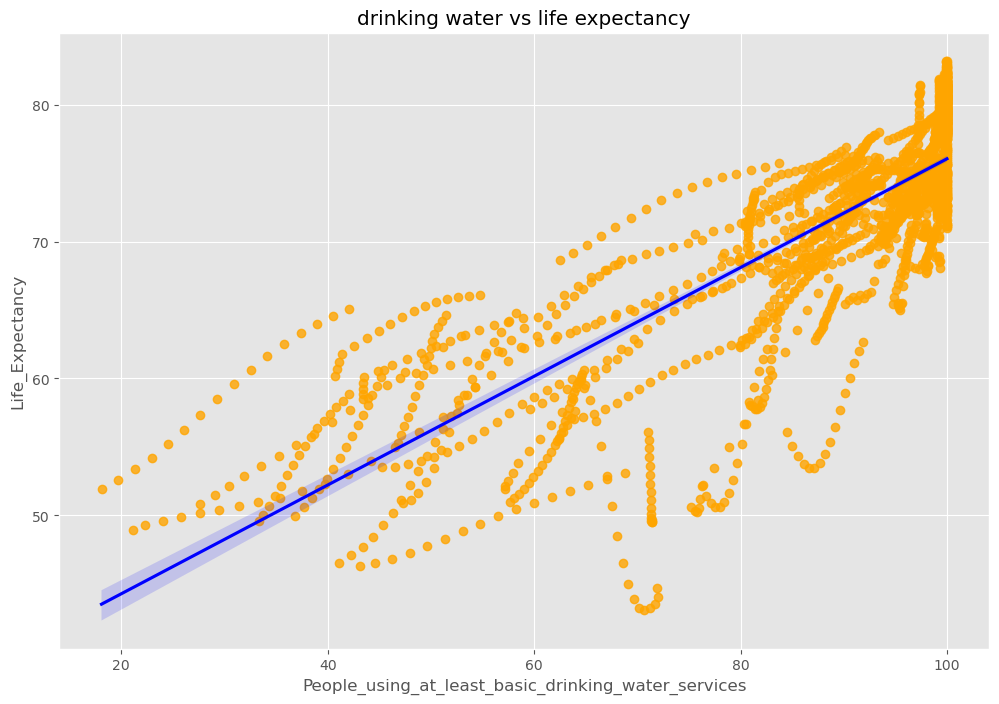

In [50]:

sns.regplot(x="People_using_at_least_basic_drinking_water_services", y="Life_Expectancy", data=df,
            scatter_kws={"color":"orange"}, line_kws={"color":"blue"}). set (title = "drinking water vs life expectancy")



<AxesSubplot:xlabel='Individuals_using_the_Internet', ylabel='Life_Expectancy'>

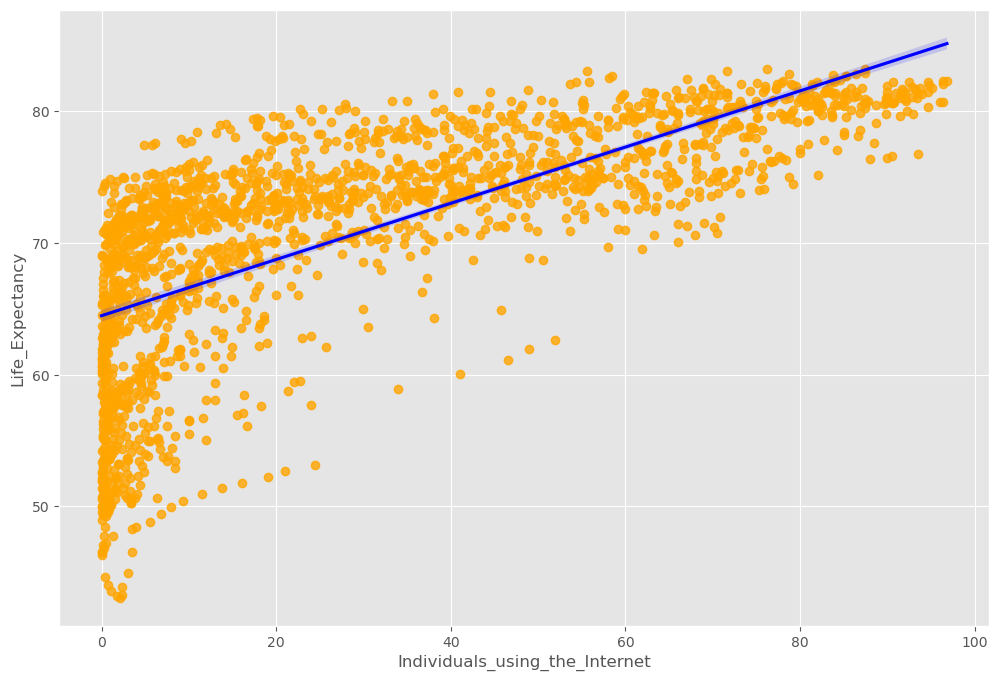

In [43]:

sns.regplot(x="Individuals_using_the_Internet", y="Life_Expectancy", data=df, 
            scatter_kws={"color":"orange"}, line_kws={"color":"blue"}). set (title = "Internet vs life expectancy")



[Text(0.5, 1.0, 'Obesity vs life expectancy')]

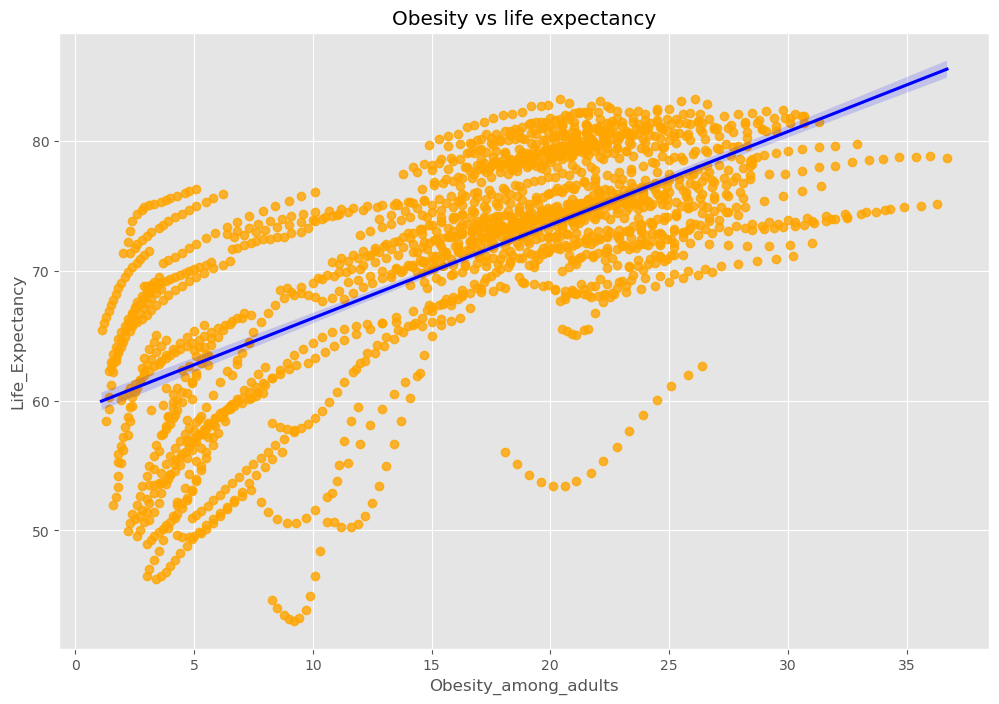

In [49]:

sns.regplot(x="Obesity_among_adults", y="Life_Expectancy", data=df, 
            scatter_kws={"color":"orange"}, line_kws={"color":"blue"}). set (title = "Obesity vs life expectancy")

